# Linear Regression
X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

crime_df = pd.read_csv("crime_data.csv")
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


In [5]:
crime_df.corr()

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.756505,0.533198,-0.135459,0.322519,-0.175224,-0.026283
X2,0.756505,1.000000,0.509339,-0.184445,0.291031,-0.199070,-0.045570
X3,0.533198,0.509339,1.000000,0.120265,0.311526,-0.277475,0.124502
X4,-0.135459,-0.184445,0.120265,1.000000,-0.537162,0.182364,0.681072
X5,0.322519,0.291031,0.311526,-0.537162,1.000000,-0.626953,-0.513958
X6,-0.175224,-0.199070,-0.277475,0.182364,-0.626953,1.000000,0.591663
X7,-0.026283,-0.045570,0.124502,0.681072,-0.513958,0.591663,1.000000


<Axes: >

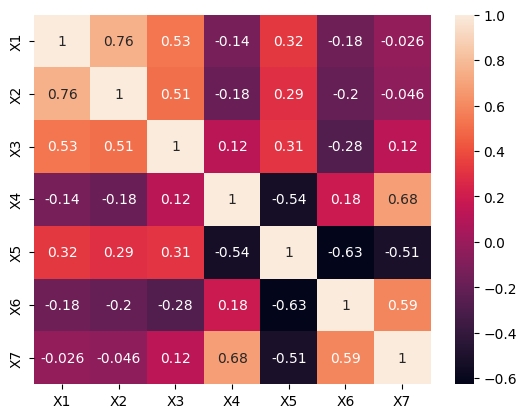

In [6]:
sns.heatmap(crime_df.corr(), annot=True)

In [7]:
crime_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [8]:
from sklearn.linear_model import LinearRegression

crime_df = crime_df[['X5','X1']]
# x is what we are using to predict y
X = np.array(crime_df['X5']).reshape(-1,1)

# y is what we are predicting
y = np.array(crime_df['X1']).reshape(-1,1)

#1. train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#2. Create the model and the fit the training data to it
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [10]:
#3. predict new values using the test data
y_pred = regression_model.predict(X_test)
y_pred

array([[657.03984654],
       [683.63091813],
       [763.40413288],
       [816.58627605],
       [603.85770337],
       [803.29074026],
       [763.40413288],
       [630.44877496],
       [763.40413288],
       [710.22198971],
       [630.44877496],
       [630.44877496],
       [696.92645392],
       [603.85770337],
       [657.03984654]])

In [11]:
# r squared
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

0.13245401513853428


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.13245401513853428

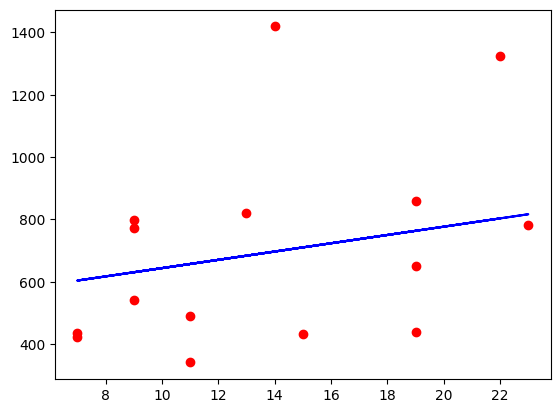

In [15]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test, y_pred, color='b')

# we see low correlation because the data set is small, and there is also a decent number of outliers

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


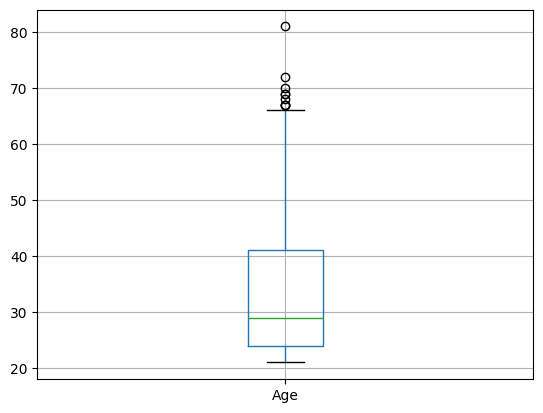

In [17]:
boxplot = diabetes_df.boxplot(column = ['Age'], return_type='axes')

In [20]:
X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Standardize/normalize - transforming the values to that the mean is 0 and SD is 1
# model wont be impacted by large numbers because theyre large
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]
<class 'numpy.ndarray'>


In [21]:
print(knn.score(X_test, y_test))

0.7142857142857143


In [23]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()
diabetes_pred_df['Predicted_Outcome'] = y_pred.tolist()
diabetes_pred_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcome,Predicted_Outcome
0,0.523387,-0.739446,-0.444600,0.720042,0.956067,0.232733,-0.152282,0.786051,0,0
1,-0.590921,-0.289349,0.329998,0.661122,-0.691043,0.433777,-1.077306,-1.059081,0,0
2,-0.590921,-0.417948,-0.171213,-1.224301,-0.691043,-0.145702,-1.044503,-1.059081,0,0
3,1.080541,-0.450098,0.557822,-1.224301,-0.691043,-0.878919,1.245094,0.031224,0,0
4,0.801964,0.482248,1.013468,-1.224301,-0.691043,-0.252136,-0.873932,1.373138,0,1
5,0.523387,-0.578697,0.193304,0.661122,0.956067,0.670299,-0.499986,1.792486,0,0
6,-0.869498,-1.607492,-0.900247,-0.163750,-0.032199,-1.375615,-0.503266,-0.975211,0,0
7,-1.148075,-0.128599,-3.087349,-1.224301,-0.691043,0.209081,1.494391,0.869920,0,0
8,-0.033767,1.060945,0.193304,0.484364,0.401251,-0.086571,-0.454063,0.282833,0,1
9,0.244810,0.835896,0.466692,-1.224301,-0.691043,0.197255,-0.847690,2.631182,0,1


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[126,  25],
       [ 41,  39]])

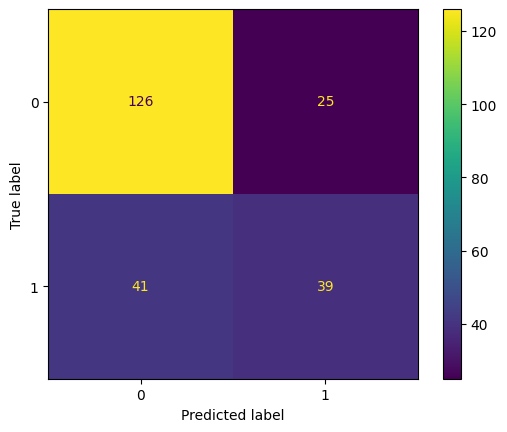

In [26]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)